In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour',2:'Virginica'})

In [2]:
#수치형 데이터 추출
features = ['수치평 변수1','수치형 변수2']
x = iris.drop(columns='Class')

#수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [6]:
#주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

pca_fit = pca.fit(x)


print('고유 값 : ',pca.singular_values_)
print("분산 설명력 : ",pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력 :  [0.72962445 0.22850762 0.03668922 0.00517871]


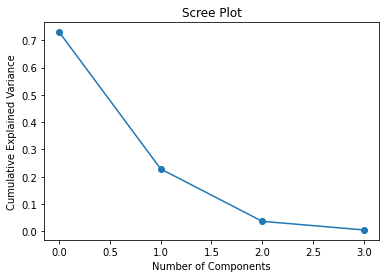

In [7]:
#Scree Plot으로 사용할 주성분의 개수 정하기
import matplotlib.pyplot as plt

plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-')
plt.show()

In [9]:
pca = PCA(n_components=2)

principaComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principaComponents,columns= ['pca1','pca2'])

principal_iris.head()

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


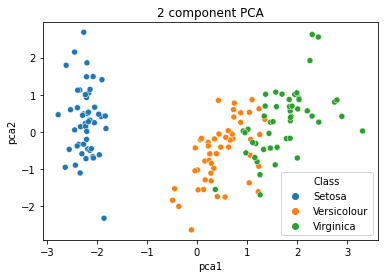

In [11]:
#주성분 산포도 확인
import seaborn as sns

plt.title('2 component PCA')
sns.scatterplot(x='pca1',y='pca2', hue=iris.Class, data = principal_iris)

plt.show()